In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
path = "coffee/total-production.csv"
coffee_production = pd.read_csv("../Data/coffee/total-production.csv").T

coffee_production.columns = coffee_production.iloc[0]

coffee_production = coffee_production.drop("total_production")


# Coffee Production Stats

* Create a bar chart of the top 10 coffee producers by total production in 'total-production.csv', sorted from highest to lowest. Change the xticks to two letter country abbreviations.


* Data Prep Code

<mark style="background-color: #000000"> coffee_production = pd.read_csv("coffee/total-production.csv").T </mark> 

<mark style="background-color: #000000"> coffee_production.columns = coffee_production.iloc[0] </mark> 

<mark style="background-color: #000000"> coffee_production = coffee_production.drop("total_production") </mark> 


In [3]:
coffee_production.head()

total_production,Angola,Bolivia (Plurinational State of),Brazil,Burundi,Ecuador,Indonesia,Madagascar,Malawi,Papua New Guinea,Paraguay,...,Panama,Sierra Leone,Sri Lanka,Thailand,Togo,Trinidad & Tobago,Uganda,Venezuela,Viet Nam,Yemen
1990,50.345,122.777,27285.6286,487.393,1503.815,7441.383,982.447,104.628,962.841,130.627,...,214.987,42.783,95.87,757.017,161.308,14.581,1955.009,1122.477,1310.288,0.0
1991,79.331,103.536,27293.4934,667.199,2123.824,8493.196,932.513,124.286,746.816,79.653,...,192.532,54.379,81.549,1468.936,432.652,17.792,2088.001,940.704,1437.848,0.0
1992,77.52,120.235,34603.3542,620.238,1185.48,5569.478,1121.684,137.161,900.111,54.291,...,196.978,39.084,53.181,1254.945,85.648,14.328,2185.074,1215.298,2340.447,0.0
1993,32.608,50.823,28166.9786,393.354,2069.007,6743.288,441.859,62.111,1019.481,70.046,...,142.066,37.451,53.79,1275.201,194.939,16.079,3141.706,1332.881,3020.216,0.0
1994,76.802,116.944,28192.047,664.143,2375.766,5367.878,641.372,84.112,1138.659,24.689,...,248.313,72.738,42.448,1399.135,176.296,18.435,2392.753,988.996,3631.609,0.0


In [4]:
coffee_production.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29 entries, 1990 to 2018
Data columns (total 56 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   Angola                            29 non-null     object
 1   Bolivia (Plurinational State of)  29 non-null     object
 2   Brazil                            29 non-null     object
 3   Burundi                           29 non-null     object
 4   Ecuador                           29 non-null     object
 5   Indonesia                         29 non-null     object
 6   Madagascar                        29 non-null     object
 7   Malawi                            29 non-null     object
 8   Papua New Guinea                  29 non-null     object
 9   Paraguay                          29 non-null     object
 10  Peru                              29 non-null     object
 11  Rwanda                            29 non-null     object
 12  Timor-Leste             

In [5]:
top10_producers = coffee_production.sum().sort_values(ascending = False).head(10)
top10_producers.head()

total_production
Brazil       1190965.7353
Viet Nam      439540.9519
Colombia      345871.4464
Indonesia     245116.7707
Ethiopia      141542.8931
dtype: object

Text(0, 0.5, 'Amount (Million)')

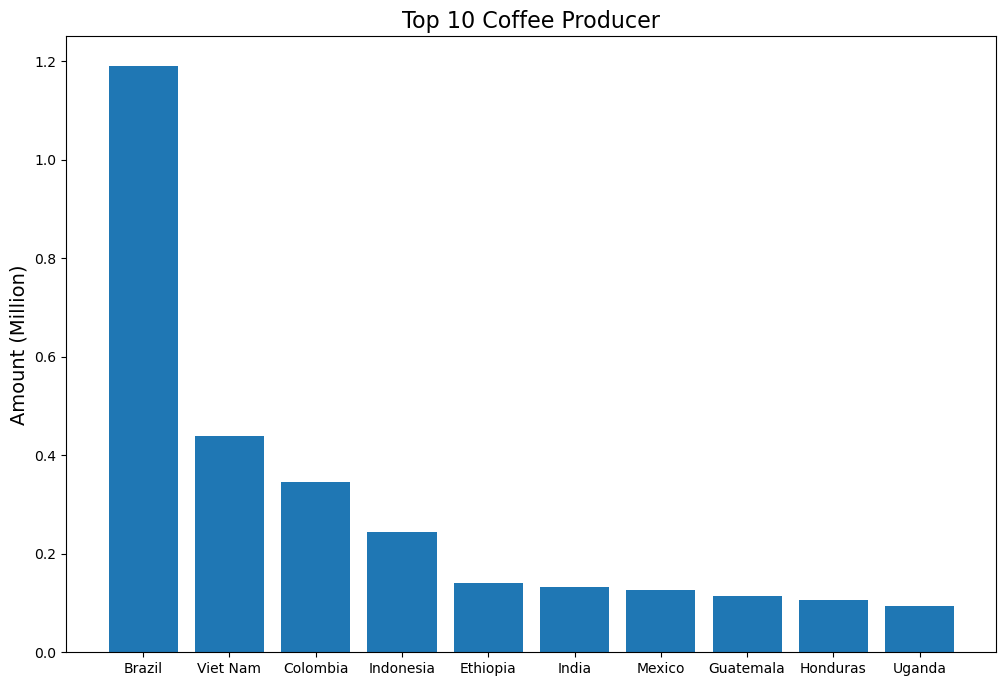

In [6]:
fig, ax = plt.subplots(figsize = (12, 8))

ax.bar(
    top10_producers.index,
    top10_producers.values/1000000
)

ax.set_title('Top 10 Coffee Producer', fontsize = 16)
ax.set_ylabel('Amount (Million)', fontsize = 14)

# Top 5 over time

* Create a line chart with the top 5 nations over time. Make sure to include a legend! Consider converting the index to datetime64[ns].

In [7]:
countries = []
for i in top10_producers.index[:5]:
    countries.append(i)

top5 = pd.DataFrame(coffee_production)
top5.index = pd.to_datetime(top5.index)
top5 = coffee_production[countries]
top5.head()

total_production,Brazil,Viet Nam,Colombia,Indonesia,Ethiopia
1990-01-01,27285.6286,1310.288,14396.0,7441.383,2909.451
1991-01-01,27293.4934,1437.848,17980.397,8493.196,2924.664
1992-01-01,34603.3542,2340.447,14946.878,5569.478,1825.171
1993-01-01,28166.9786,3020.216,11422.422,6743.288,2967.004
1994-01-01,28192.047,3631.609,12964.0,5367.878,2762.73


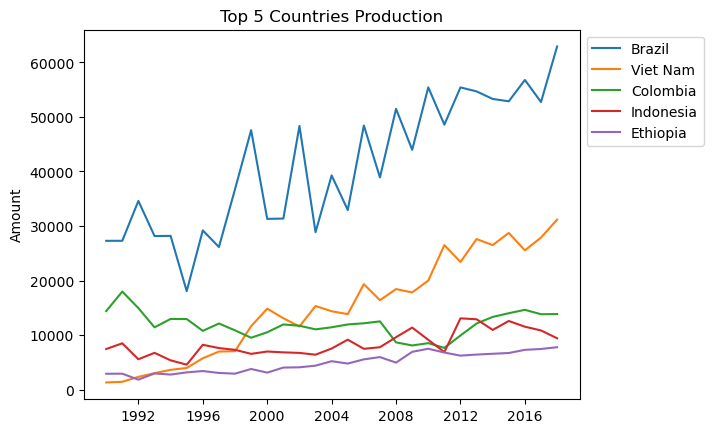

In [14]:
fig, ax = plt.subplots()

ax.plot(
    top5.index,
    top5.values,
    label = top5.columns
)

ax.set_title('Top 5 Countries Production')
ax.set_ylabel('Amount')
ax.legend(bbox_to_anchor = (1,1))

# COMPOSITION OVER TIME

Our client is interested in looking at how Brazil's share of global coffee production has changed over time.

Build a plot that global total production as well as Brazil's contribution to global production over time.

In [45]:
coffee_production.sum(axis = 1)

1990-01-01     93230.0596
1991-01-01    101266.6844
1992-01-01     98525.8992
1993-01-01     91764.6216
1994-01-01     93313.1940
1995-01-01     87317.4582
1996-01-01    103302.5960
1997-01-01     99861.1990
1998-01-01    108892.2131
1999-01-01    131383.7967
2000-01-01    113766.9727
2001-01-01    107899.1264
2002-01-01    122615.8119
2003-01-01    105506.8097
2004-01-01    116065.7460
2005-01-01    111170.6363
2006-01-01    135390.6429
2007-01-01    121842.4598
2008-01-01    134799.6943
2009-01-01    127973.8147
2010-01-01    142017.5376
2011-01-01    142475.3877
2012-01-01    151284.5121
2013-01-01    154095.3148
2014-01-01    149753.0421
2015-01-01    153987.6449
2016-01-01    159915.5434
2017-01-01    158074.1842
2018-01-01    170936.7377
dtype: float64

In [77]:
brazil_vs_others = pd.DataFrame(coffee_production['Brazil'].astype('float64'))

rest_of_world = coffee_production.drop(columns=['Brazil']).sum(axis=1)
brazil_vs_others['Rest_of_World'] = rest_of_world
brazil_vs_others.head()

,Brazil,Rest_of_World
1990,27285.6286,65944.431
1991,27293.4934,73973.191
1992,34603.3542,63922.545
1993,28166.9786,63597.643
1994,28192.0470,65121.147


In [78]:
brazil_vs_others.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29 entries, 1990 to 2018
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Brazil         29 non-null     float64
 1   Rest_of_World  29 non-null     float64
dtypes: float64(2)
memory usage: 1.7+ KB


In [79]:
brazil_vs_others.head()

,Brazil,Rest_of_World
1990,27285.6286,65944.431
1991,27293.4934,73973.191
1992,34603.3542,63922.545
1993,28166.9786,63597.643
1994,28192.0470,65121.147


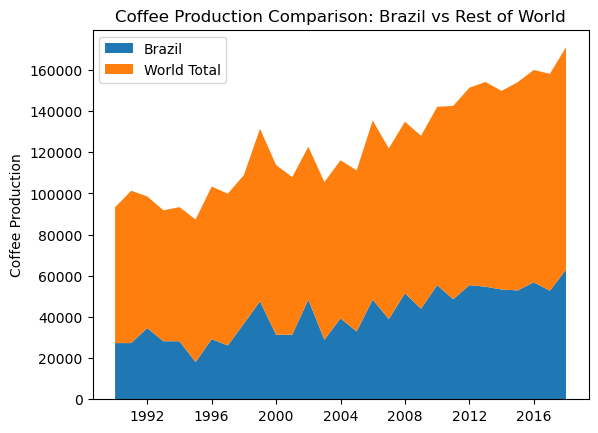

In [82]:
fig, ax = plt.subplots()
brazil_vs_others.index = pd.to_datetime(brazil_vs_others.index)
ax.stackplot(
    brazil_vs_others.index,
    brazil_vs_others['Brazil'],
    brazil_vs_others['Rest_of_World'],
    labels=['Brazil', 'World Total']
)

ax.set_ylabel('Coffee Production')
ax.set_title('Coffee Production Comparison: Brazil vs Rest of World')
ax.legend(loc='upper left')

plt.show()

## PRODUCTION RELATIONSHIPS

We want to explore how Brazil compares to its competitors in terms of production. Build a scatterplot  comparing Brazil Vs. VietNam Production and one comparing Brazil to Venezuela.

Text(0.5, 0, 'Brazil Production (Millions 60kg Bags)')

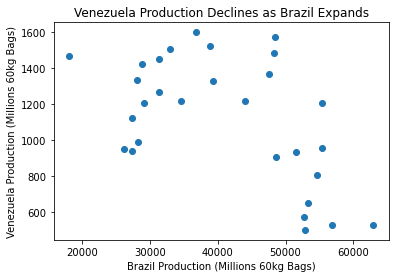

Text(0.5, 0, 'Brazil Production (Millions 60kg Bags)')

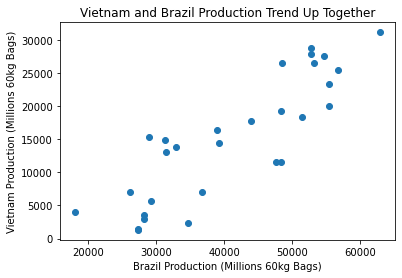

# COMPOSITION OF COFFEE PRODUCTION

* Create a Pie chart with the top 5 producers, as well as the sum for the rest of countries.

* Finally, create two donut charts, one representing Brazil's share of global production in 1990, and one for Brazil's share in 2018.

In [13]:
coffee_production_top5_2018

total_production
Brazil           62924.8836
Viet Nam         31174.0742
Colombia          13857.962
Indonesia         9417.5942
Ethiopia          7776.2234
Rest of World    45786.0003
Name: 2018, dtype: object

Text(0.5, 0.98, 'Share of Global Coffee Production 2018')

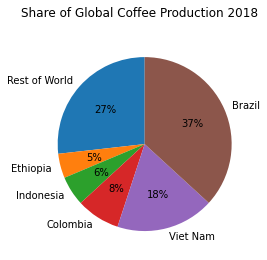

In [26]:


brazil_vs_others.head()

total_production,Brazil,rest_of_world
1990,27285.6286,105831.740
1991,27293.4934,117110.277
1992,34603.3542,103163.116
1993,28166.9786,103042.356
1994,28192.0470,105516.077


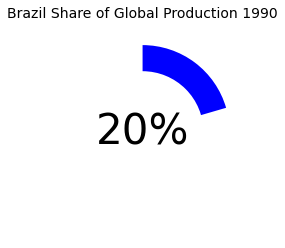

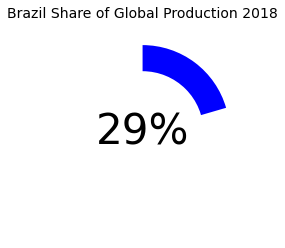

# Coffee Consumption Vs. Prices

Compare coffee prices with coffee consumption in the following countries. 

Is there a relationship between coffee consumption and the price these countries pay?

Plot a dual axis bar chart of price vs consumption totals for these countries.

In [19]:
consumption = pd.read_csv("coffee/imports.csv")


consumption.head()

imports
   Austria               1551.083333
   Belgium               4639.533333
   Belgium/Luxembourg    2329.444444
   Bulgaria               397.250000
   Croatia                349.136364
Name: imports, dtype: float64

In [20]:
prices = pd.read_csv("coffee/retail-prices.csv")

prices.head()

,retail_prices,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Austria,10.816777,10.088300,11.015453,10.971302,10.110375,11.434879,11.964680,9.646799,8.763797,...,15.342163,14.768212,18.366446,18.498896,19.028698,19.050773,16.423841,12.450331,13.730684,14.635762
1,Cyprus,6.247241,6.181015,6.335541,5.739514,7.019868,9.403974,9.116998,8.918322,10.176600,...,12.207506,11.501104,13.377483,14.039735,14.282561,14.304636,11.699779,11.699779,12.141280,12.781457
2,Denmark,8.410596,8.101545,8.366446,7.682119,9.823400,12.295806,10.618102,10.949227,10.860927,...,11.677704,12.008830,15.275938,14.834437,14.039735,14.194260,12.913907,10.905077,11.103753,11.699779
3,Finland,6.578366,6.004415,5.430464,4.282561,6.026490,8.763797,7.108168,7.726269,7.549669,...,7.748344,8.145695,11.832230,10.596026,9.470199,9.514349,8.609272,8.101545,9.050773,9.359823
4,France,8.233996,7.571744,5.099338,4.481236,5.298013,8.145695,7.284768,6.092715,6.136865,...,8.366446,7.991170,9.116998,8.653422,8.653422,8.322296,6.865342,7.196468,7.505519,8.123620


In [21]:
prices.head()

retail_prices
   Austria    11.571135
   Cyprus     10.437695
   Denmark    10.494025
   Finland     7.211692
   France      6.850879
dtype: float64

In [22]:
price_cons

,country,Price,Imports
5,Germany,9.515110,16357.666667
11,Japan,21.472939,6862.275235
6,Italy,14.199589,6696.958333
4,France,6.850879,6512.458333
9,Spain,8.029992,4046.291667
7,Netherlands,8.931263,2928.125000
10,Sweden,8.054350,1620.625000
0,Austria,11.571135,1551.083333
3,Finland,7.211692,1157.541667
2,Denmark,10.494025,991.791667


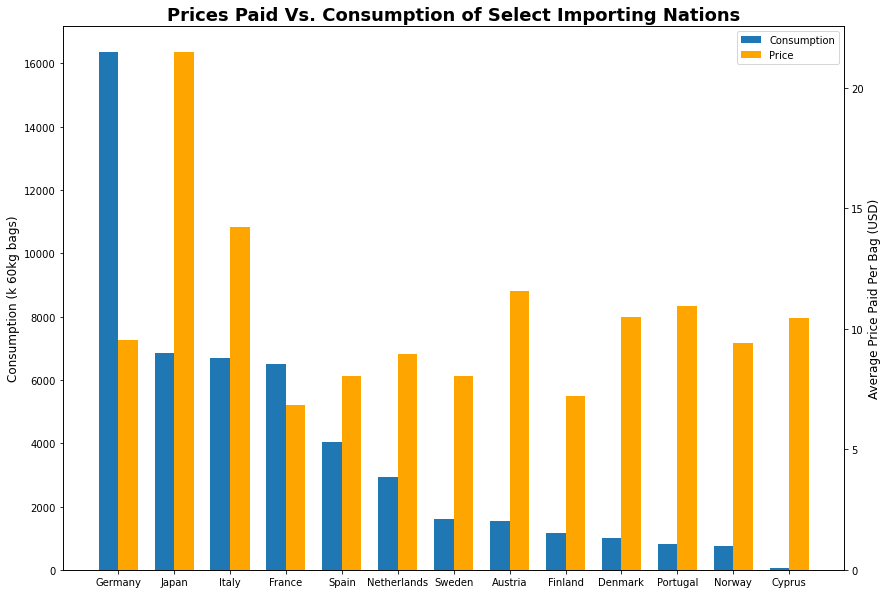